This code applies to K>=2. However, there are two problems remained to be resolved and I will update it later.

1.Sometimes all points belong to less than K clusters (may due to the random initialization), left one or more clusters kth column of rArray to be [[0],[0],[0],...]]. Cosequently, when calculating the new mu, the mu_k will be 'nan'.

2.When k>=3, to find the find mu coordinates is fine. But the lines which to differentiate different clusters (intersection line in k=2 case) become more complicated.


Another problem I came through in the coding. I tried to use Dustin has shown in the class "normalizeData(x)" to normalize data to remain the data points in [0,1]. But there is a detail that must be modified. The data points was originally divided by the smallest values both in x and y dimension. But the x,y columns must be divided by minimum values in x and y dimension individually. Otherwise, the x dimension will be squeezed significantly. And the initialized mu (which are defined to remain in (0,1)) could far away from the points.

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


faithful=pd.read_csv('faithful.csv')
faithful.columns=['eruption','waiting']
faith=np.array(faithful)

Initial status, with mus' coordinates inilized randomly.


<IPython.core.display.Javascript object>


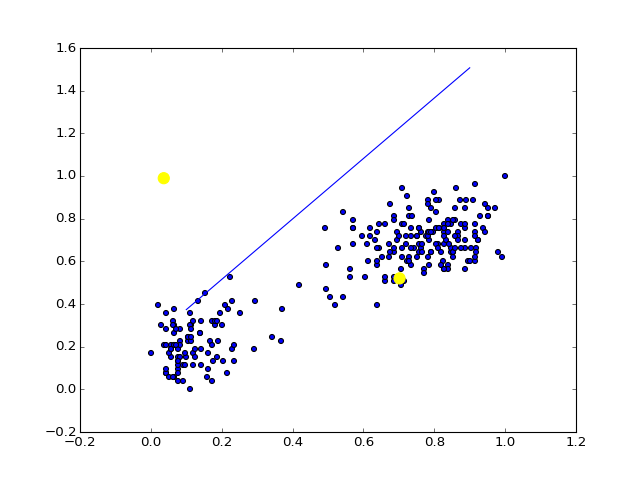

Run 1, the distance between new mu and old mu is 0.640652245987


<IPython.core.display.Javascript object>


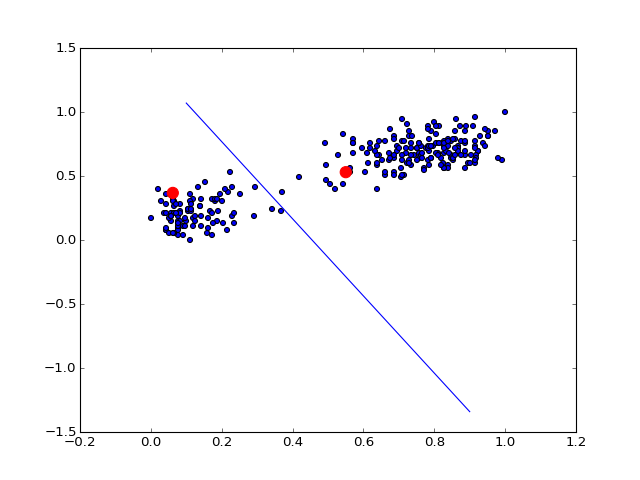

Run 2, the distance between new mu and old mu is 0.31859647813


<IPython.core.display.Javascript object>


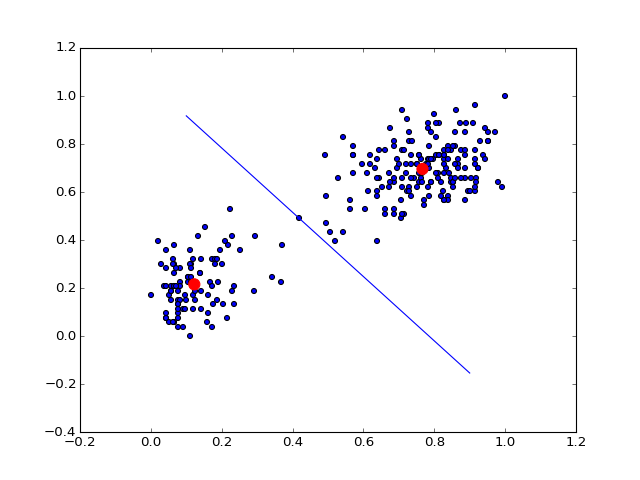

Run 3, the distance between new mu and old mu is 0.00421807405093


<IPython.core.display.Javascript object>


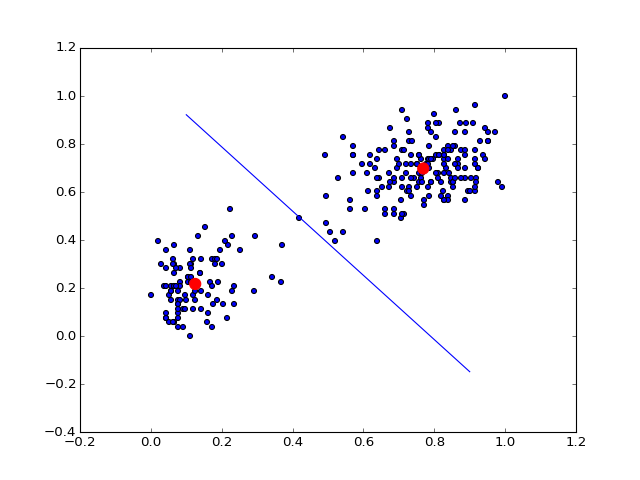

Run 4, the distance between new mu and old mu is 0.00471783975016


<IPython.core.display.Javascript object>


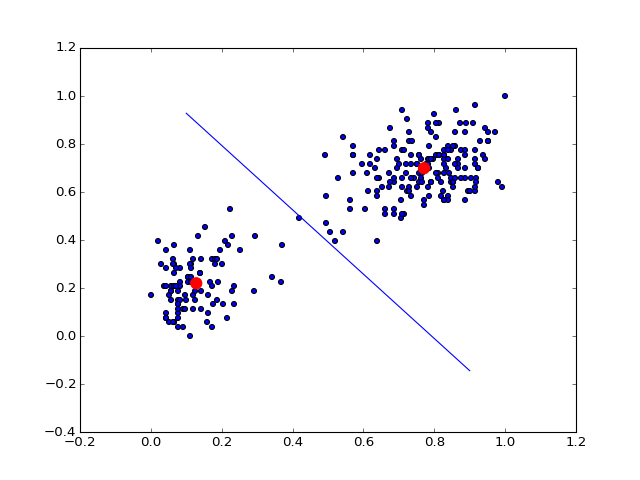

Run 5, the distance between new mu and old mu is 0.0


<IPython.core.display.Javascript object>


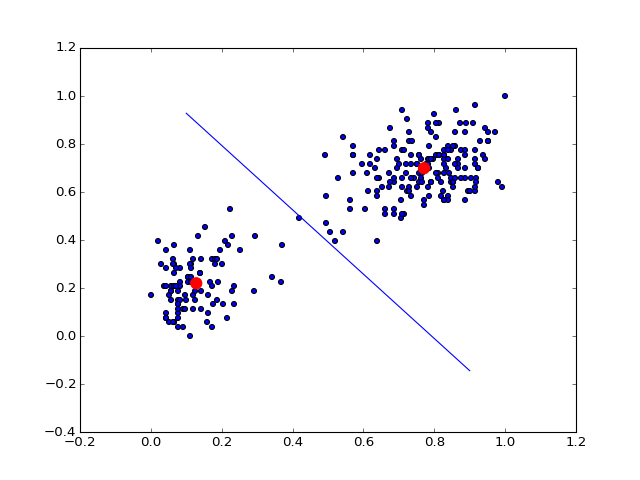

In [9]:
%matplotlib notebook
N=len(faith)
K=2

def intersectionPlot (point1,point2): #muCoordinate[0],muCoordinate[1]
    inter_x = np.linspace(0.1, 0.9, 100)
    x1=point1[0]
    y1=point1[1]
    x2=point2[0]
    y2=point2[1]
    inter_y=(0.5*(x2**2-x1**2+y2**2-y1**2)-(x2-x1)*inter_x)/(y2-y1)
    plt.plot(inter_x,inter_y)
    #plt.plot((x1,x2),(y1,y2),'.')

def normalizeData(x):
    x_norm_x=(x[:,0]-x[:,0].min())/(x[:,0].max()-x[:,0].min())
    x_norm_x=np.reshape(x_norm_x,(len(faith),1))
    x_norm_y=(x[:,1]-x[:,1].min())/(x[:,1].max()-x[:,1].min())
    x_norm_y=np.reshape(x_norm_y,(len(faith),1))
    x_norm=np.concatenate((x_norm_x,x_norm_y), axis=1)
    return x_norm


def initializeClusters(K):
    muCoordinate=np.random.rand(K,2)
    return muCoordinate

faith_norm=normalizeData(faith)
muCoordinate=initializeClusters(K)

#Initilizing the relative distance between mu_k and data points
relativeCoordinateList=np.empty([N,K]) #matrix N*K  N points N=N
pointCoordinate=normalizeData(faith)

print("Initial status, with mus' coordinates inilized randomly." )
fig, axes = plt.subplots()
plt.scatter(faith_norm[:,0],faith_norm[:,1])
plt.scatter(muCoordinate[:,0],muCoordinate[:,1],s=[100,100],color='yellow')
intersectionPlot(muCoordinate[0],muCoordinate[1])

run=0
mu_delta=1
while mu_delta>0.0001 or run<5:
    run+=1
    #Initilizing rArray: if a data point i is closest to mu_k, then rArray[i,k]=1, the rest of them equals to 0
    rArray=np.zeros([N,K])
    for i in range(0,N): # point No.
        for j in range(0,K):      # cluster No.
            relativeCoordinateList[i,j]=np.linalg.norm(muCoordinate[j]-pointCoordinate[i])#np.linalg.norm could get normalization (distance) of a 1d array right away

    for i in range(0,N):
        clusterNumber=list(relativeCoordinateList[i]).index(min(relativeCoordinateList[i]))
        rArray[i,clusterNumber]=1


    nu_x=np.dot(faith_norm[:,0],rArray)/(np.sum(rArray,axis=0))
    nu_x=np.reshape(nu_x,(K,1))
    nu_y=np.dot(faith_norm[:,1],rArray)/(np.sum(rArray,axis=0))
    nu_y=np.reshape(nu_y,(K,1))
    muCoordinate_new=np.concatenate((nu_x,nu_y), axis=1)
    mu_delta=np.linalg.norm(muCoordinate-muCoordinate_new)
    print("Run %s, the distance between new mu and old mu is %s" %(run,mu_delta))
    muCoordinate=muCoordinate_new
    fig, axes = plt.subplots()
    plt.scatter(faith_norm[:,0],faith_norm[:,1])
    plt.scatter(muCoordinate[:,0],muCoordinate[:,1], s=[100,100],color='red')
    intersectionPlot(muCoordinate[0],muCoordinate[1])

    
    
    